2. Build a predictive linear regression model for given dataset, given humidity
predict apparent temperature

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [2]:
ds=pd.read_csv("weatherHistory.csv")


In [3]:
ds.shape

(96453, 12)

In [4]:
ds.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
ds.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
ds.shape

(96453, 12)

### data cleaning 

In [9]:
ds.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
ds=ds[ds['Precip Type'].notna()]

In [11]:
ds.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [12]:
ds.shape

(95936, 12)

<AxesSubplot:>

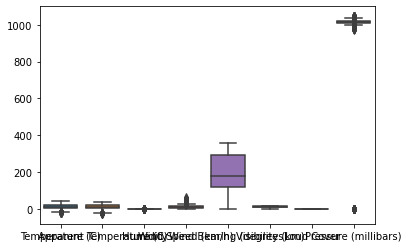

In [13]:
sns.boxplot(data=ds)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

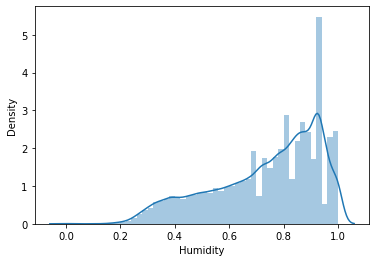

In [14]:
sns.distplot(ds['Humidity'])

<AxesSubplot:>

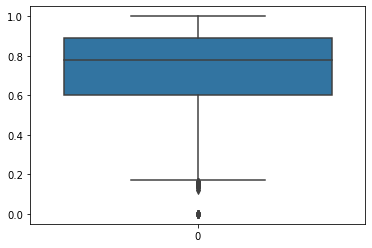

In [15]:
sns.boxplot(data=ds['Humidity'])

<AxesSubplot:>

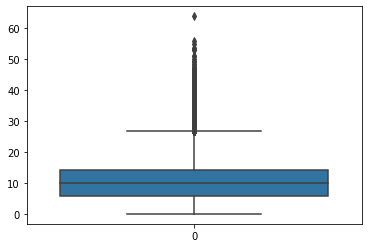

In [16]:
sns.boxplot(data=ds['Wind Speed (km/h)'])

<AxesSubplot:>

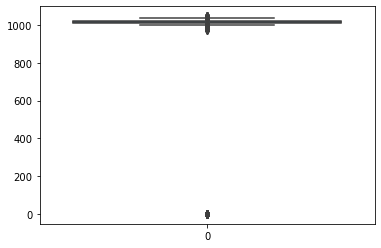

In [17]:
sns.boxplot(data=ds['Pressure (millibars)'])

In [18]:
ds=ds[(ds['Humidity']>=0) & (ds['Wind Speed (km/h)']<=60) & (ds['Pressure (millibars)']>0)]

In [19]:
ds.shape

(94647, 12)

In [20]:
x=ds["Humidity"].values
x

array([0.89, 0.85, 0.82, ..., 0.89, 0.91, 0.92])

In [21]:
x.shape

(94647,)

In [22]:
y=ds['Apparent Temperature (C)'].values
y

array([-4.05      , -3.23888889, -3.15555556, ..., -3.37777778,
       -3.64444444, -3.88888889])

In [23]:
y.shape

(94647,)

### Feature scalling 

In [24]:
def standardScalling(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_scale=(x-x_mean)/x_std
    return x_scale

In [25]:
y=standardScalling(y)
x=standardScalling(x)


In [26]:
split_ratio=0.8
split_index=int(split_ratio*len(x))

### split into training and testing

In [27]:
x_train=x[:split_index]
x_test=x[split_index:]
y_train=y[:split_index]
y_test=y[split_index:]

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

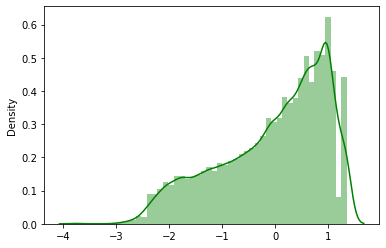

In [28]:
sns.distplot(x_train,color='green')

In [29]:
x_train.shape,x_test.shape

((75717,), (18930,))

In [30]:
y_train.shape,y_test.shape

((75717,), (18930,))

### linear regression 

In [31]:
x_train=x_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
x_train.shape,y_train.shape

((75717, 1), (75717, 1))

In [32]:
x_test=x_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
x_test.shape,y_test.shape

((18930, 1), (18930, 1))

In [33]:
theta=np.zeros((1,2))
theta.shape

(1, 2)

In [34]:
x1=np.ones((x_train.shape[0],1))
x_train=np.concatenate((x1,x_train),axis=1)
x_train.shape

(75717, 2)

In [35]:
x1=np.ones((x_test.shape[0],1))
x_test=np.concatenate((x1,x_test),axis=1)
x_test.shape

(18930, 2)

In [36]:
def compute_cost(x_train,y_train,theta): 
    """
    Description :
        This function is used to calculate cost
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
    Return :
        It returns the cost
    """    
    hx=np.dot(x_train,theta.T) 
    cost=np.sum((hx-y_train)**2)/(2*len(x_train))
    return cost     
      

In [37]:
def gradient_descent(x_train,y_train,theta,alpha,epoch):
    """
    Description :
        This function is used to update paramenter(theata)
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
        alpha : learning rate
        epoch :number of iterations
    Return :
        It returns the updated theta
    """ 
    for i in range(epoch):
        hx=np.dot(x_train,theta.T)       
        
        theta=theta-alpha/(len(x_train))*np.sum((hx-y_train)*x_train,axis=0)
        cost=compute_cost(x_train,y_train,theta)
        print(f"Epoch {i+1} theta0 = {theta[0][0]} theta1 = {theta[0][1]} cost = {cost}")
    return theta,cost

In [38]:
epoch=1100
alpha=0.7
result_theta,cost=gradient_descent(x_train,y_train,theta,alpha,epoch)
print(result_theta,cost)

Epoch 1 theta0 = 0.0013049535832074033 theta1 = -0.4290818990963672 cost = 0.3429318792667135
Epoch 2 theta0 = -0.006132384231946162 theta1 = -0.5541719416267399 cost = 0.3284204807735601
Epoch 3 theta0 = -0.010645918891971893 theta1 = -0.5907820217078034 cost = 0.327160750651029
Epoch 4 theta0 = -0.012667949367862419 theta1 = -0.6015393242694423 cost = 0.3270496288114219
Epoch 5 theta0 = -0.013470831127734397 theta1 = -0.604712885505575 cost = 0.3270396722609976
Epoch 6 theta0 = -0.01376959894193202 theta1 = -0.6056528974050596 cost = 0.327038766859125
Epoch 7 theta0 = -0.013876380295430233 theta1 = -0.605932441964293 cost = 0.32703868339961334
Epoch 8 theta0 = -0.013913515138315404 theta1 = -0.6060159012505589 cost = 0.3270386756122817
Epoch 9 theta0 = -0.013926178349553465 theta1 = -0.6060409142724679 cost = 0.32703867487792165
Epoch 10 theta0 = -0.013930433688603902 theta1 = -0.6060484387417613 cost = 0.32703867480803933
Epoch 11 theta0 = -0.013931847578200974 theta1 = -0.606050710

Epoch 134 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 135 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 136 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 137 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 138 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 139 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 140 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 141 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 142 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 143 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 144 theta0 = -0.01393253852623739 

Epoch 267 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 268 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 269 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 270 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 271 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 272 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 273 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 274 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 275 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 276 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 277 theta0 = -0.013932538526237381

Epoch 393 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 394 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 395 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 396 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 397 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 398 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 399 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 400 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 401 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 402 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 403 theta0 = -0.013932538526237381

Epoch 529 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 530 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 531 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 532 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 533 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 534 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 535 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 536 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 537 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 538 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 539 theta0 = -0.013932538526237381

Epoch 663 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 664 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 665 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 666 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 667 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 668 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 669 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 670 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 671 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 672 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 673 theta0 = -0.013932538526237381

Epoch 795 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 796 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 797 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 798 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 799 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 800 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 801 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 802 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 803 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 804 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 805 theta0 = -0.013932538526237381

Epoch 922 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 923 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 924 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 925 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 926 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 927 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 928 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 929 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 930 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 931 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 932 theta0 = -0.01393253852623739 

Epoch 1046 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 1047 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 1048 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 1049 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 1050 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 1051 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 1052 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 1053 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 1054 theta0 = -0.01393253852623739 theta1 = -0.6060516996372771 cost = 0.3270386748006225
Epoch 1055 theta0 = -0.013932538526237381 theta1 = -0.6060516996372771 cost = 0.32703867480062243
Epoch 1056 theta0 = -0.0139325

In [39]:
result_theta

array([[-0.01393254, -0.6060517 ]])

In [40]:
x_test.shape

(18930, 2)

In [41]:
y_pred=np.dot(x_test,result_theta.T)

### Performance matrix 

In [42]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [43]:
R2_score=round(r2_score(y_test,y_pred),2)
R2_score

0.37

In [44]:
mean_square_error1=round(mean_squared_error(y_test,y_pred),2)
mean_square_error1

0.57

In [45]:
mean_absolute_error1=round(mean_absolute_error(y_test,y_pred))
mean_absolute_error1

1

In [46]:
root_mean_square_error=round(math.sqrt(mean_square_error1))
root_mean_square_error

1